# Problem Statement


The landscape of modern commerce has evolved significantly, with e-commerce emerging as a dominant force. Gone are the days of traditional brick-and-mortar sales; instead, companies establish online platforms to connect directly with consumers. Giants like Amazon, Flipkart, and others have paved the way, offering a vast array of products accessible with a few clicks.

Enterprises like 'Ebuss' are seizing opportunities in this thriving market, carving out niches across diverse product categories. From household essentials to electronics, Ebuss caters to varied consumer needs, aiming to secure a substantial market share.

Yet, in this dynamic arena, staying competitive demands innovation. Ebuss recognizes the importance of leveraging technology to enhance user experience and solidify its position. To compete with established leaders like Amazon and Flipkart, it's crucial to not just keep pace but to lead the way.

As a seasoned Machine Learning Engineer at Ebuss, the task at hand is clear: develop a model to refine product recommendations based on user feedback. This entails crafting a sentiment-based recommendation system, encompassing several key steps:

**1. Data Acquisition and Sentiment Analysis:** Gather user reviews and ratings to discern sentiment.

**2. Building a Recommendation Engine:** Construct a robust recommendation system leveraging the insights from sentiment analysis.

**3. Enhancing Recommendations with Sentiment Analysis:** Integrate sentiment analysis results to fine-tune and personalize product recommendations.

**4. End-to-End Deployment:** Bring the project to fruition by deploying a seamless user interface, facilitating intuitive interaction for users.

In this fast-paced e-commerce landscape, staying ahead demands not just meeting but exceeding customer expectations. With a sentiment-driven approach to recommendations, Ebuss aims to elevate the shopping experience, fostering customer satisfaction and loyalty.

Steps involved in the project
1. Exploratory data analysis
2. Data cleaning
3. Text preprocessing
4. Feature extraction
4. Training the text classification model
5. Creating a recommedation systems (User based and Item Based choose the bestone)
6. Evaluating the model and recommedation system using the Test data
7. Create flask application
8. Deploy the application to heroku platform

Steps involved in the project
1. Exploratory data analysis
2. Data cleaning
3. Text preprocessing
4. Feature extraction
4. Training the text classification model
5. Creating a recommedation systems (User based and Item Based choose the bestone)
6. Evaluating the model and recommedation system using the Test data
7. Create flask application
8. Deploy the application to heroku platform

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import re, nltk, spacy, string
import en_core_web_sm
nlp = en_core_web_sm.load()
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
%matplotlib inline



from plotly.offline import plot
import plotly.graph_objects as go
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report,roc_auc_score,confusion_matrix,f1_score,precision_score,accuracy_score
from sklearn.metrics import pairwise_distances
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Exploratory Data Analysis - Data Cleaning and Preprocessing

In [10]:
# Reading the input from folder
df_reviews = pd.read_csv('/content/drive/My Drive/SentimentBasedProductRecommendation/sample30.csv')
df=df_reviews.copy()
df.sample(5)

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
22038,AVpfnRuSilAPnD_xfB8l,Yes to Grapefruit,"Personal Care,Bath, Shower & Soap,Body Wash & ...","Yes To, Inc",Yes To Grapefruit Rejuvenating Body Wash,2014-03-27T00:00:00.000Z,False,True,4,I picked this up at the store after having suc...,Great product!,NaN,NaN,rreeeeenniee,Positive
6676,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2014-12-27T21:45:02.000Z,NaN,True,4,"cleans well this product cleans well, smells f...",Clean,NaN,NaN,layie,Positive
4160,AVpe9W4D1cnluZ0-avf0,Hoover,"Home,Home Appliances,Vacuums & Floor Care,Upri...",Hoover,Hoover174 Platinum Collection153 Lightweight B...,2012-10-22T00:00:00.000Z,False,False,2,I thought I was getting a good vacuum based on...,Wish I never bought it!,NaN,NaN,cs,Positive
8919,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-06T04:00:59.000Z,NaN,True,5,I love these wipes they have been great for ye...,Great,NaN,NaN,skladj,Positive
7175,AVpf3VOfilAPnD_xjpun,Clorox,"Household Essentials,Cleaning Supplies,Kitchen...",Clorox,Clorox Disinfecting Wipes Value Pack Scented 1...,2015-01-18T00:00:00.000Z,False,True,4,This is the best disinfect product hands down!...,Best disinfect product,NaN,NaN,bresemone,Positive


In [11]:
def calcMissingRowCount(df):
    # summing up the missing values (column-wise) and displaying fraction of NaNs
    return df.isnull().sum()

calcMissingRowCount(df_reviews)

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,46
reviews_didPurchase,14068
reviews_doRecommend,2570
reviews_rating,0
reviews_text,0


In [12]:
# Remove the missing row of user_sentiment
df_reviews = df_reviews[~df_reviews.user_sentiment.isnull()]

In [13]:
#map the categorical user_sentiment to numerical 1 or 0 for modelling
df_reviews['user_sentiment'] = df_reviews['user_sentiment'].map({'Positive':1,'Negative':0})

In [14]:
#get the value count of user_sentiments column
df_reviews["user_sentiment"].value_counts(normalize=True)

,proportion
user_sentiment,
1,0.887763
0,0.112237


/tmp/ipython-input-868831452.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='user_sentiment', ylabel='count'>

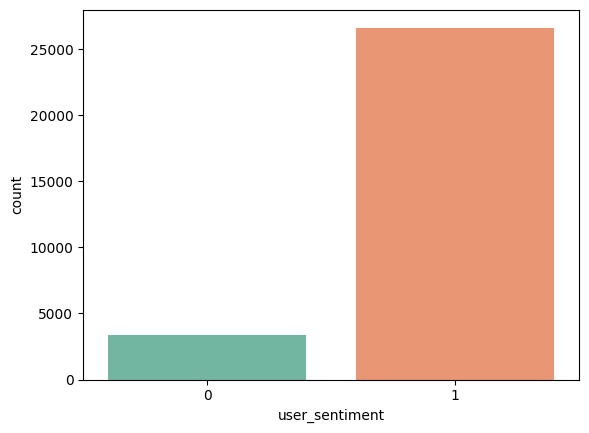

In [18]:
#Visualize using count plot
sns.countplot(x='user_sentiment', data= df_reviews, palette="Set2")

In [20]:
df_reviews["reviews_rating"].describe()

,reviews_rating
count,29999.000000
mean,4.483116
std,0.988453
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [21]:
df_reviews["reviews_rating"].value_counts()

,count
reviews_rating,
5,20830
4,6020
1,1384
3,1345
2,420


/tmp/ipython-input-1896168682.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='reviews_rating', ylabel='count'>

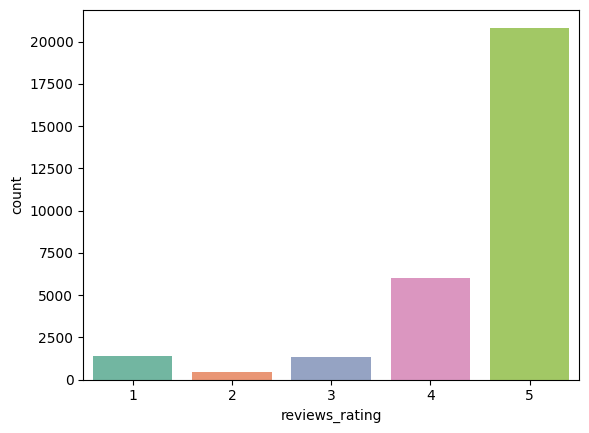

In [19]:
#visualize the user_rating..
sns.countplot(x='reviews_rating', data= df_reviews, palette="Set2")

In [22]:
df_reviews[df_reviews["user_sentiment"]==1]["reviews_rating"].describe()

,reviews_rating
count,26632.000000
mean,4.560378
std,0.865194
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [23]:
df_reviews[df_reviews["user_sentiment"]==0]["reviews_rating"].describe()

,reviews_rating
count,3367.000000
mean,3.871993
std,1.537589
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


In [24]:
### Total reviews
total = len(df_reviews['reviews_text'])
print ("Number of reviews: ",total)

### How many unique reviewers?
print ("Number of unique reviewers: ",len(df_reviews['reviews_username'].unique()))
reviewer_prop = float(len(df_reviews['reviews_username'].unique())/total)
print ("Prop of unique reviewers: ",round(reviewer_prop,3))

### Average star score
print ("Average rating score: ",round(df_reviews['reviews_rating'].mean(),3))

Number of reviews:  29999
Number of unique reviewers:  24915
Prop of unique reviewers:  0.831
Average rating score:  4.483


In [25]:
#data overivew
print('rows: ', df_reviews.shape[0])
print('columns: ', df_reviews.shape[1])
print('\nfeatures: ', df_reviews.columns.to_list())
print('\nmissing vlues: ', df_reviews.isnull().values.sum())
print('\nUnique values: \n', df_reviews.nunique())

rows:  29999
columns:  15

features:  ['id', 'brand', 'categories', 'manufacturer', 'name', 'reviews_date', 'reviews_didPurchase', 'reviews_doRecommend', 'reviews_rating', 'reviews_text', 'reviews_title', 'reviews_userCity', 'reviews_userProvince', 'reviews_username', 'user_sentiment']

missing vlues:  74977

Unique values: 
 id                        271
brand                     214
categories                270
manufacturer              227
name                      271
reviews_date             6857
reviews_didPurchase         2
reviews_doRecommend         2
reviews_rating              5
reviews_text            27282
reviews_title           18534
reviews_userCity          977
reviews_userProvince       41
reviews_username        24914
user_sentiment              2
dtype: int64


In [26]:
# Info of the dataframe
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29999 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29999 non-null  object
 1   brand                 29999 non-null  object
 2   categories            29999 non-null  object
 3   manufacturer          29858 non-null  object
 4   name                  29999 non-null  object
 5   reviews_date          29953 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27429 non-null  object
 8   reviews_rating        29999 non-null  int64 
 9   reviews_text          29999 non-null  object
 10  reviews_title         29809 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  169 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29999 non-null  int64 
dtypes: int64(2), object(13)
memory usage: 3.7

/tmp/ipython-input-2885038700.py:3: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





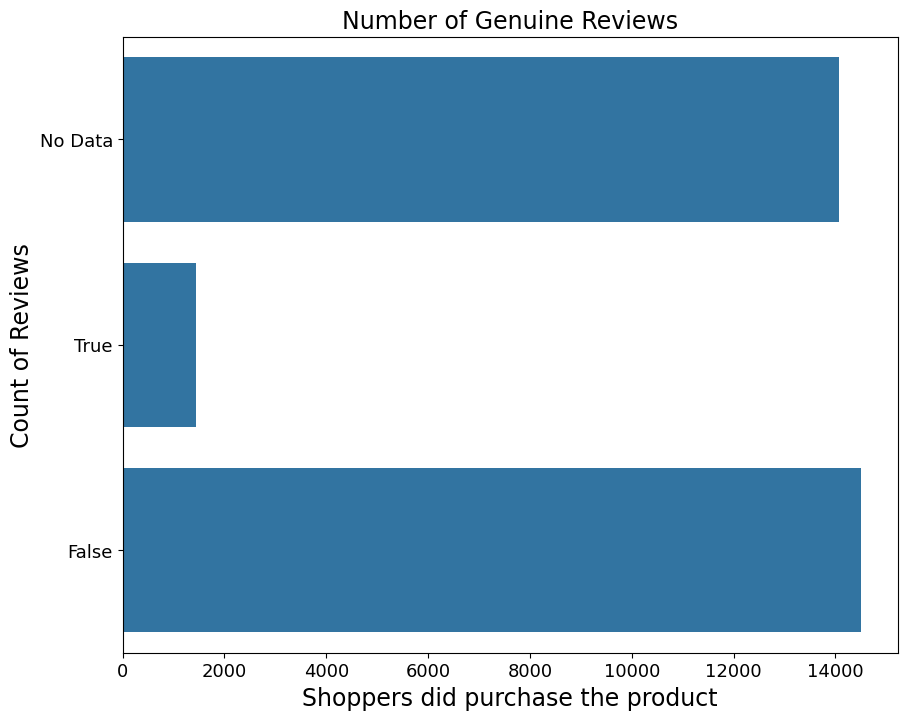

In [28]:
# Number of Postive and Negatives in the data frame showing the class imbalance
#Replace the Nan values to No Data for reviewers did purchase or not
df_reviews['reviews_didPurchase'].fillna('No Data', inplace=True)
#Distribution of reviews for actual purchasing customers
plt.figure(figsize=(10,8))
ax = sns.countplot(df_reviews['reviews_didPurchase'])
ax.set_xlabel(xlabel="Shoppers did purchase the product", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Number of Genuine Reviews', fontsize=17)
ax.tick_params(labelsize=13)

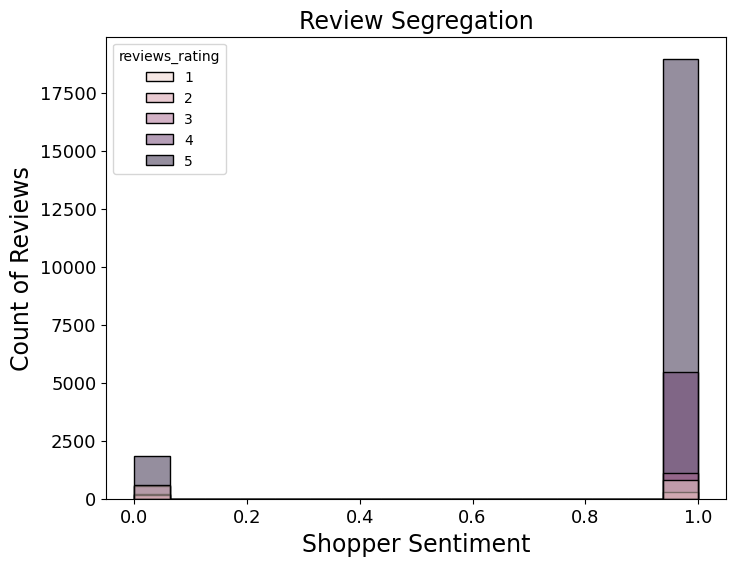

In [29]:
# To see any corrections are required in the dataframe is required using rating and user sentiment
# from IPython.core.pylabtools import figsize
# figsize(10,10)
# sns.histplot(hue=df['reviews_rating'],x=df['user_sentiment'])
# plt.yticks(np.arange(0,30000,10000))
# plt.show()

plt.figure(figsize=(8,6))
ax = sns.histplot(hue=df_reviews['reviews_rating'],x=df_reviews['user_sentiment'])
ax.set_xlabel(xlabel="Shopper Sentiment", fontsize=17)
ax.set_ylabel(ylabel='Count of Reviews', fontsize=17)
ax.axes.set_title('Review Segregation', fontsize=17)
ax.tick_params(labelsize=13)

In [31]:
df_reviews[(df_reviews["user_sentiment"]==1) & (df_reviews["reviews_rating"]<4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
9,Don't buy,Got as a surprise for my husband there is noth...,1
11,Waste of Money,Purchased this thinking it would have some sor...,1
14,Disappointed,First time purchase of this type of product. M...,1
18,Pretty nice,I bought this because it had better reviews th...,3
54,New formula is terrible,I used (and loved) this product for several ye...,1
...,...,...,...
29050,Didn't Do Much For Dryness,I received this product from Influenster. I ab...,3
29051,Not the best,I used this product for a month straight befor...,3
29053,clay conditioning,Got this item as a compliment from influenster...,3
29054,Eh,I am not in love with the conditioner. The cla...,3


In [32]:
df_reviews[(df_reviews["user_sentiment"]==0) & (df_reviews["reviews_rating"]>=4)][["reviews_title","reviews_text", "reviews_rating"]]

,reviews_title,reviews_text,reviews_rating
92,hydrating but not too heavy,It hydrates my skin. It is not too thick and h...,4
96,This product has made a real difference on my ...,In only a week I can see the difference in my ...,4
100,Noticed a difference in just two weeks!,This product has made my skin smoother and sup...,4
106,Very rich cream,I like to use this cream on my neck and collar...,4
117,Not greasy,I finally found a moisturizing product that wi...,4
...,...,...,...
29818,Great Product,I received a complimentary sample of this prod...,5
29855,Great,This has prolonged the color in my hair! Not o...,5
29858,Makes my hair soft and shiny without excess oil!,This conditioner makes my hair very soft witho...,5
29862,Great Conditioner,This conditioner has become a staple in my hai...,5


In [33]:
pd.crosstab(df_reviews["user_sentiment"], df_reviews["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,597,140,220,550,1860,3367
1,787,280,1125,5470,18970,26632
All,1384,420,1345,6020,20830,29999


As per the above results, there looks to be mismtach between review_rating and user_sentiment. there are records that have higher user rating but user sentiment is negative and lower user rating but user sentiment is positive. We can either clean up those records or update the target column to the correct user sentiment, so that will be helpful for modelling. Here, updating the user_sentiment to 0 (but was 1) when the reviews_rating is less than 4, and updating the user_sentiment to 1(but was 0), when the reviews_rating is greater than or equal to 4

In [34]:
df_reviews.loc[(df_reviews["user_sentiment"]==1) & (df_reviews["reviews_rating"]<4), "user_sentiment"] = 0

In [35]:
df_reviews.loc[(df_reviews["user_sentiment"]==0) & (df_reviews["reviews_rating"]>=4), "user_sentiment"] = 1

In [36]:
pd.crosstab(df_reviews["user_sentiment"], df_reviews["reviews_rating"], margins=True)

reviews_rating,1,2,3,4,5,All
user_sentiment,,,,,,
0,1384,420,1345,0,0,3149
1,0,0,0,6020,20830,26850
All,1384,420,1345,6020,20830,29999


from the above table, we can see that we don't have mismatch between the reviews_rating and user_sentiment

In [37]:
df_reviews["user_sentiment"].value_counts()

,count
user_sentiment,
1,26850
0,3149


In [38]:
df_reviews["brand"].value_counts()

,count
brand,
Clorox,10585
Warner Home Video,3325
Disney,1199
L'oreal Paris,1186
FOX,887
...,...
Pacific Natural Foods,1
LDR,1
National Mfg.,1


<Axes: xlabel='brand'>

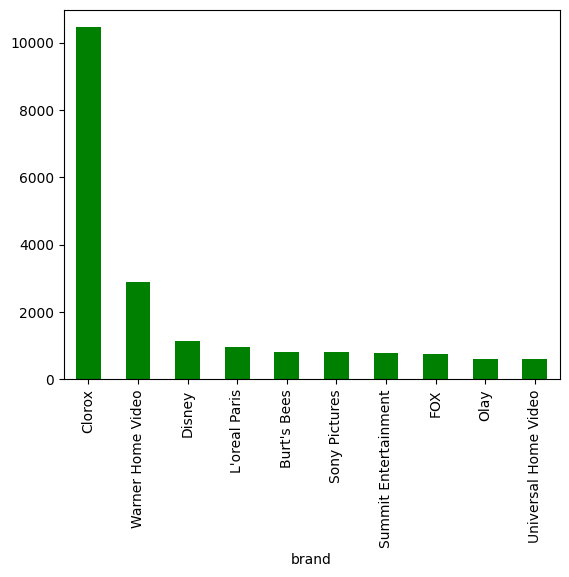

In [39]:
# Filter the top 10 brands among the positive sentiments
df_reviews[df_reviews['user_sentiment']==1].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar',color='g')

<Axes: xlabel='brand'>

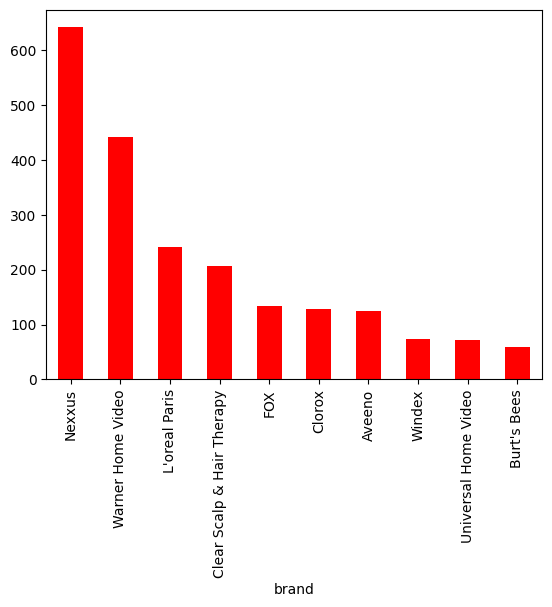

In [40]:
# Filter the top 10 brands among the negative sentiments
df_reviews[df_reviews['user_sentiment']==0].groupby('brand')['brand'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='r')

In [41]:
def filter_products(productId, pos=1):
    review_count = df_reviews[(df_reviews.id==productId) & (df_reviews.user_sentiment==pos)]['brand'].count()
    return review_count

In [42]:
#group the dataframe by product id and view the # of pos review / neg reviews count
df_custom =  df_reviews.groupby('id', as_index=False)['user_sentiment'].count()
df_custom["pos_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 1))
df_custom["neg_review_count"] =  df_custom.id.apply(lambda id: filter_products(id, 0))

In [43]:
df_custom.head(10)

,id,user_sentiment,pos_review_count,neg_review_count
0,AV13O1A8GV-KLJ3akUyj,1,1,0
1,AV14LG0R-jtxr-f38QfS,2,2,0
2,AV16khLE-jtxr-f38VFn,27,10,17
3,AV1YGDqsGV-KLJ3adc-O,348,274,74
4,AV1YIch7GV-KLJ3addeG,1,1,0
5,AV1YlENIglJLPUi8IHsX,17,14,3
6,AV1YmBrdGV-KLJ3adewb,18,17,1
7,AV1YmDL9vKc47QAVgr7_,89,74,15
8,AV1Ymf_rglJLPUi8II2v,34,34,0
9,AV1Yn94nvKc47QAVgtst,25,24,1


In [44]:
#sort the product by sentiment % - postive reviews / total number of reviews
df_custom['sentiment %'] = np.round((df_custom['pos_review_count']/df_custom['user_sentiment'])*100,2)
df_custom.sort_values(by='sentiment %', ascending=False)[:20]

,id,user_sentiment,pos_review_count,neg_review_count,sentiment %
0,AV13O1A8GV-KLJ3akUyj,1,1,0,100.0
1,AV14LG0R-jtxr-f38QfS,2,2,0,100.0
4,AV1YIch7GV-KLJ3addeG,1,1,0,100.0
8,AV1Ymf_rglJLPUi8II2v,34,34,0,100.0
11,AV1Ynb3bglJLPUi8IJxJ,5,5,0,100.0
13,AV1Yo6FPglJLPUi8IK3u,1,1,0,100.0
10,AV1YnUMYglJLPUi8IJpK,1,1,0,100.0
247,AVpfml2VilAPnD_xe0m6,1,1,0,100.0
245,AVpfmVnVLJeJML43AMqC,6,6,0,100.0
45,AVpe5Mv4ilAPnD_xQQyy,4,4,0,100.0


In [45]:
df_reviews["manufacturer"].value_counts()

,count
manufacturer,
Clorox,8546
Test,3325
AmazonUs/CLOO7,2039
L'oreal Paris,1232
Walt Disney,1142
...,...
Unfi,1
LDR,1
Stanley Hardware,1


In [46]:
#Let's find out the most common users.
df_reviews["reviews_username"].value_counts()[:10]

,count
reviews_username,
mike,41
byamazon customer,41
chris,32
lisa,16
tony,15
sandy,15
rick,15
john,14
dave,14


<Axes: xlabel='reviews_username'>

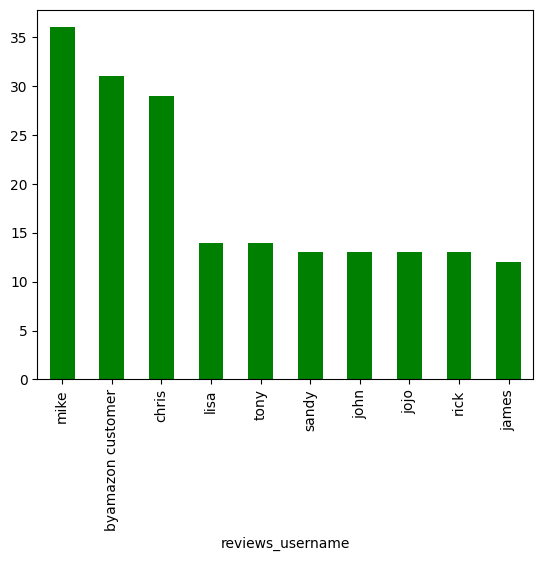

In [47]:
#plot the customers by 'positive user sentiment'
df_reviews[df_reviews['user_sentiment']==1].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='g')

<Axes: xlabel='reviews_username'>

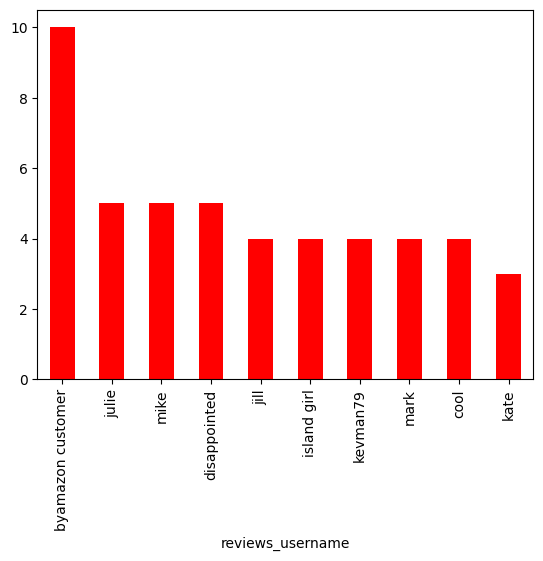

In [48]:
#plot the customers by 'negative user sentiment'
df_reviews[df_reviews['user_sentiment']==0].groupby('reviews_username')['reviews_username'].count().sort_values(ascending=False)[:10].plot(kind='bar', color='r')

In [49]:
#removing nan/null from username
df_reviews = df_reviews[~df_reviews.reviews_username.isnull()]

In [50]:
#Let's combine the reviews_text and reviews_title for better analysis
df_reviews["reviews_title"] = df_reviews["reviews_title"].fillna('')
df_reviews["reviews_full_text"] = df_reviews[['reviews_title', 'reviews_text']].agg('. '.join, axis=1).str.lstrip('. ')

In [51]:
#get the missing row cout for each of the columns
calcMissingRowCount(df_reviews)

,0
id,0
brand,0
categories,0
manufacturer,141
name,0
reviews_date,40
reviews_didPurchase,0
reviews_doRecommend,2541
reviews_rating,0
reviews_text,0


In [52]:
# To download the stopwords from NLTK library
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

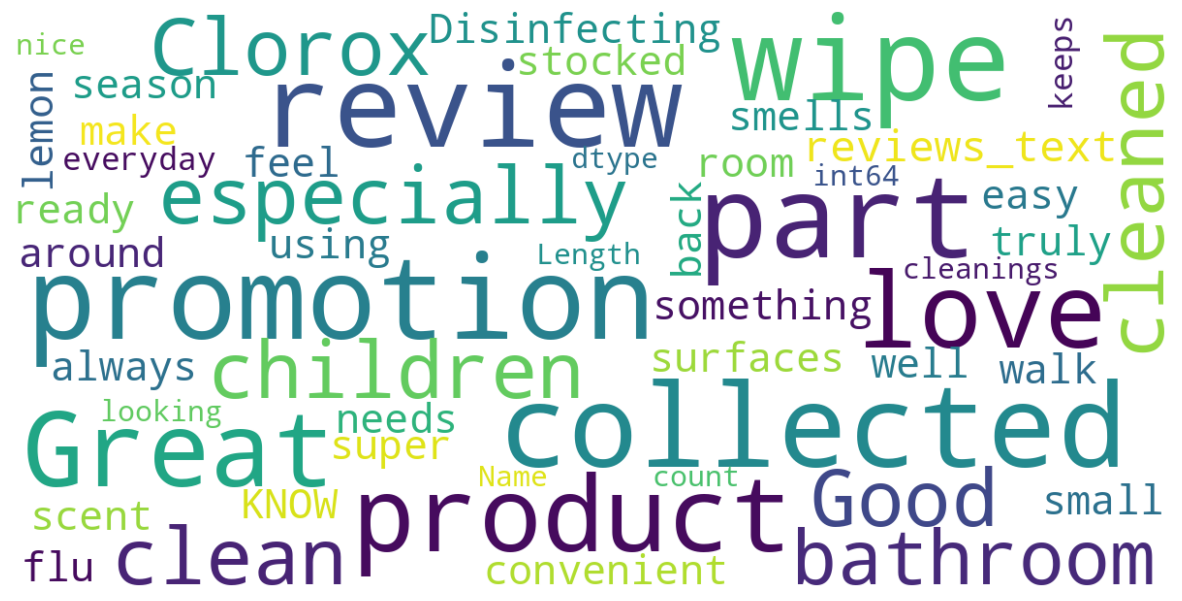

In [53]:
# To Check the most word occurence using word cloud
from wordcloud import WordCloud ,STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=300, max_font_size=40,
                     scale=3, random_state=1).generate(str(df_reviews['reviews_text'].value_counts()))
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# 2. Text Preprocessing

### Text lower cased , removed Special Charater and lemmatized

In [54]:
#Common functions for cleaning the text data
import nltk
from nltk.stem import LancasterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
import unicodedata
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import html

# special_characters removal
def remove_special_characters(text, remove_digits=True):
    """Remove the special Characters"""
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

stopword_list= stopwords.words('english')

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [55]:
def normalize_and_lemmaize(input_text):
    input_text = remove_special_characters(input_text)
    words = nltk.word_tokenize(input_text)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [56]:
# Take the Review comment and user sentiment as dataframe
review_df = df_reviews[['reviews_text','user_sentiment']]
review_df.head()

,reviews_text,user_sentiment
0,i love this album. it's very good. more to the...,1
1,Good flavor. This review was collected as part...,1
2,Good flavor.,1
3,I read through the reviews on here before look...,0
4,My husband bought this gel for us. The gel cau...,0


In [58]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [60]:
# create a new column lemmatized_review using the emmatize_text function
review_df['lemmatized_text'] = review_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))
review_df.head()

/tmp/ipython-input-3734498083.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,reviews_text,user_sentiment,lemmatized_text
0,i love this album. it's very good. more to the...,1,love album good hip hop side current pop sound...
1,Good flavor. This review was collected as part...,1,good flavor review collect part promotion
2,Good flavor.,1,good flavor
3,I read through the reviews on here before look...,0,read review look buy one couple lubricants ult...
4,My husband bought this gel for us. The gel cau...,0,husband buy gel us gel cause irritation felt l...


In [64]:
# new dataframe with lemmatized text and user sentiment
review_new_df = review_df[['lemmatized_text','user_sentiment']]
review_new_df

,lemmatized_text,user_sentiment
0,love album good hip hop side current pop sound...,1
1,good flavor review collect part promotion,1
2,good flavor,1
3,read review look buy one couple lubricants ult...,0
4,husband buy gel us gel cause irritation felt l...,0
...,...,...
29995,get conditioner influenster try im love far oi...,1
29996,love receive review purpose influenster leave ...,1
29997,first love smell product wash hair smooth easy...,1
29998,receive influenster never go back anything els...,1


### Dividing the dataset into train and test data and handle the class imbalance

In [65]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [66]:
# Train and Test Divide
x_train,x_test,y_train,y_test = train_test_split(review_new_df['lemmatized_text'],review_new_df['user_sentiment'],train_size=0.75,random_state=45,stratify=review_new_df['user_sentiment'])
y_train.value_counts()

,count
user_sentiment,
1,20101
0,2351


# 4. Feature Extraction using Count Vectorizer and TFIDF Transformer

In [67]:
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
x_count = count_vect.fit_transform(x_train)


tfidf_transformer = TfidfTransformer()
x_train_transformed = tfidf_transformer.fit_transform(x_count)
x_train_transformed.shape

(22452, 14751)

In [69]:
#creating the pickle for countvectorizer and TFIDF Transformer
import pickle
pickle.dump(count_vect,open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/count_vector.pkl','wb'))
pickle.dump(tfidf_transformer,open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/tfidf_transformer.pkl','wb'))

In [70]:
count = Counter(y_train)
print('Before sampling :',count)

sampler = SMOTE()

x_train_sm,y_train_sm = sampler.fit_resample(x_train_transformed,y_train)

count = Counter(y_train_sm)
print('After sampling :',count)

Before sampling : Counter({1: 20101, 0: 2351})
After sampling : Counter({1: 20101, 0: 20101})


# 5. Training text classification model
- Logistic Regression
- Random Forest Classifer
- XGBoost
#### Choose the best model with hyperparameter tuning

In [71]:
# Define a Function to calculate and print model Metrics
performance=[]

def model_metrics(y,y_pred,model_name,metrics):
  Accuracy = accuracy_score(y,y_pred)
  roc = roc_auc_score(y,y_pred)
  confusion = confusion_matrix(y,y_pred)
  precision = precision_score(y,y_pred)
  f1 = f1_score(y,y_pred)
  TP = confusion[1,1]  # true positive
  TN = confusion[0,0]  # true negatives
  FP = confusion[0,1]  # false positives
  FN = confusion[1,0]  # false negatives
  sensitivity= TP / float(TP+FN)
  specificity = TN / float(TN+FP)

  print("*"*50)
  print('Confusion Matrix =')
  print(confusion)
  print("sensitivity of the %s = %f" % (model_name,round(sensitivity,2)))
  print("specificity of the %s = %f" % (model_name,round(specificity,2)))
  print("Accuracy Score of %s = %f" % (model_name,Accuracy))
  print('ROC AUC score of %s = %f' % (model_name,roc))
  print("Report=",)
  print(classification_report(y,y_pred))
  print("*"*50)
  metrics.append(dict({'Model_name':model_name,
                       'Accuracy':Accuracy,
                       'Roc_auc_score':roc,
                       'Precision':precision,
                       'F1_score':f1}))
  return metrics



## Logistic Regression

In [72]:
# 1. Logsitic Regression
lr = LogisticRegression()
lr.fit(x_train_sm,y_train_sm)

LogisticRegression()

In [73]:
y_pred = lr.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred,'Logistic Regression',performance)

**************************************************
Confusion Matrix =
[[18747  1354]
 [ 1559 18542]]
sensitivity of the Logistic Regression = 0.920000
specificity of the Logistic Regression = 0.930000
Accuracy Score of Logistic Regression = 0.927541
ROC AUC score of Logistic Regression = 0.927541
Report=
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     20101
           1       0.93      0.92      0.93     20101

    accuracy                           0.93     40202
   macro avg       0.93      0.93      0.93     40202
weighted avg       0.93      0.93      0.93     40202

**************************************************


## RandomForest Classifier

In [74]:
# 2. RandomForest Classifier
rf = RandomForestClassifier()
rf.fit(x_train_sm,y_train_sm)

RandomForestClassifier()

In [75]:
y_pred_rf = rf.predict(x_train_sm)
performance = model_metrics(y_train_sm,y_pred_rf,'RandomForestClassifier',performance)

**************************************************
Confusion Matrix =
[[20098     3]
 [    3 20098]]
sensitivity of the RandomForestClassifier = 1.000000
specificity of the RandomForestClassifier = 1.000000
Accuracy Score of RandomForestClassifier = 0.999851
ROC AUC score of RandomForestClassifier = 0.999851
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20101
           1       1.00      1.00      1.00     20101

    accuracy                           1.00     40202
   macro avg       1.00      1.00      1.00     40202
weighted avg       1.00      1.00      1.00     40202

**************************************************


## XGBoost

In [76]:
!pip install xgboost
import xgboost as xgb

In [77]:
#4.XGBoostClassifier
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train_sm,y_train_sm)
y_pred_xgbc = xgb_classifier.predict(x_train_sm)
peformance = model_metrics(y_train_sm,y_pred_xgbc,'XGBClassifier',peformance)


**************************************************
Confusion Matrix =
[[18772  1329]
 [  386 19715]]
sensitivity of the XGBClassifier = 0.980000
specificity of the XGBClassifier = 0.930000
Accuracy Score of XGBClassifier = 0.957340
ROC AUC score of XGBClassifier = 0.957340
Report=
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     20101
           1       0.94      0.98      0.96     20101

    accuracy                           0.96     40202
   macro avg       0.96      0.96      0.96     40202
weighted avg       0.96      0.96      0.96     40202

**************************************************


In [ ]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.976711,0.976711,0.983177,0.976554
1,RandomForestClassifier,0.999929,0.999929,0.999953,0.999929
2,XGBClassifier,0.988722,0.988722,0.984347,0.988773


## Hyperparameter Tuning of models

Hyperparameter tuning of Random Forests Classsifier model

In [78]:
import os

rf_final_model_path = '/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/RandomForest_classifier.pkl'

if os.path.exists(rf_final_model_path):
    print("Loading model from file...")
    with open(rf_final_model_path, "rb") as f:
        rf_final = pickle.load(f)
else:
    n_estimators = [200,500]
    max_depth = [10,15]
    min_samples_leaf = [5, 10, 20]
    criterion  = ['gini','entropy']
    params = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'min_samples_leaf': min_samples_leaf,
              'criterion':criterion}

    grid_cv = GridSearchCV(estimator=rf,
                       param_grid=params,
                       n_jobs = -1,
                       scoring = 'roc_auc',
                       verbose = 1)
    grid_cv.fit(x_train_sm,y_train_sm)
    rf_final=grid_cv.best_estimator_
    print(f"Best score: {grid_cv.best_score_}")
    pickle.dump(rf_final,open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/RandomForest_classifier.pkl','wb'))

rf_final

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best score: 0.9316419045103057


RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       n_estimators=500)

In [79]:
y_pred_rfgcv = rf_final.predict(x_train_sm)
performance = model_metrics(
    y_train_sm,y_pred_rfgcv,'RandomForestClassifier with hyperparmater',performance)


**************************************************
Confusion Matrix =
[[15288  4813]
 [ 1333 18768]]
sensitivity of the RandomForestClassifier with hyperparmater = 0.930000
specificity of the RandomForestClassifier with hyperparmater = 0.760000
Accuracy Score of RandomForestClassifier with hyperparmater = 0.847122
ROC AUC score of RandomForestClassifier with hyperparmater = 0.847122
Report=
              precision    recall  f1-score   support

           0       0.92      0.76      0.83     20101
           1       0.80      0.93      0.86     20101

    accuracy                           0.85     40202
   macro avg       0.86      0.85      0.85     40202
weighted avg       0.86      0.85      0.85     40202

**************************************************


Hyperparameter tuning of XGBoost Classsifier model

In [81]:
xgb_final_model_path = '/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/xgboost_classifier.pkl'

if os.path.exists(xgb_final_model_path):
    print("Loading model from file...")
    with open(xgb_final_model_path, "rb") as f:
        xgb_final = pickle.load(f)
else:
    params_1 = {
        'max_depth': [5, 10],
        'n_estimators': [200, 500]
    }
    grid_cv_boost = GridSearchCV(
                    estimator=xgb_classifier,
                    param_grid=params_1,
                    n_jobs = -1,
                    scoring = 'roc_auc',
                    verbose = 1)
    grid_cv_boost.fit(x_train_sm,y_train_sm)
    print('Best score for GradientBoosting=',grid_cv_boost.best_score_)
    xgb_final=grid_cv_boost.best_estimator_
    pickle.dump(xgb_final,open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/xgboost_classifier.pkl','wb'))

xgb_final

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best score for GradientBoosting= 0.9901388056983773


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [82]:
y_pred_xgbgcv = xgb_final.predict(x_train_sm)
peformance = model_metrics(
    y_train_sm,y_pred_xgbgcv, 'Tuned GradientBoostClassifier',peformance)

**************************************************
Confusion Matrix =
[[20009    92]
 [   11 20090]]
sensitivity of the Tuned GradientBoostClassifier = 1.000000
specificity of the Tuned GradientBoostClassifier = 1.000000
Accuracy Score of Tuned GradientBoostClassifier = 0.997438
ROC AUC score of Tuned GradientBoostClassifier = 0.997438
Report=
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     20101
           1       1.00      1.00      1.00     20101

    accuracy                           1.00     40202
   macro avg       1.00      1.00      1.00     40202
weighted avg       1.00      1.00      1.00     40202

**************************************************


In [83]:
metrics_df = pd.DataFrame(performance)
metrics_df

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.927541,0.927541,0.931946,0.927170
1,RandomForestClassifier,0.999851,0.999851,0.999851,0.999851
2,XGBClassifier,0.957340,0.957340,0.936847,0.958318
3,RandomForestClassifier with hyperparmater,0.847122,0.847122,0.795895,0.859301
4,Tuned GradientBoostClassifier,0.997438,0.997438,0.995441,0.997443


In [84]:
# After doing multiple tuning we get the below model and will be used in the sentiment based analysis
final_model = xgb_final

In [85]:
pickle.dump(final_model,open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/model.pkl','wb'))

In [86]:
final_model.fit(x_train_sm,y_train_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [87]:
#Evaluatopn between lr , rf and boost
test_performance=[]
test_word_vect = count_vect.transform(x_test)
test_tfidf_vect = tfidf_transformer.transform(test_word_vect)

y_test_pred_lr = lr.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_lr,'Logistic Regression',test_performance)

y_test_pred_xgbc = xgb_classifier.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgbc,'XGBoost Classifier',test_performance)

y_test_pred_rf = rf_final.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_rf,'Tuned RandomForestClassifier',test_performance)

y_test_pred_xgb = final_model.predict(test_tfidf_vect)
test_peformance = model_metrics(y_test,y_test_pred_xgb,'Tuned XGBoostClassifier',test_performance)

test_metrics_df = pd.DataFrame(test_performance)
test_metrics_df

**************************************************
Confusion Matrix =
[[ 576  208]
 [ 628 6072]]
sensitivity of the Logistic Regression = 0.910000
specificity of the Logistic Regression = 0.730000
Accuracy Score of Logistic Regression = 0.888295
ROC AUC score of Logistic Regression = 0.820481
Report=
              precision    recall  f1-score   support

           0       0.48      0.73      0.58       784
           1       0.97      0.91      0.94      6700

    accuracy                           0.89      7484
   macro avg       0.72      0.82      0.76      7484
weighted avg       0.92      0.89      0.90      7484

**************************************************
**************************************************
Confusion Matrix =
[[ 430  354]
 [ 291 6409]]
sensitivity of the XGBoost Classifier = 0.960000
specificity of the XGBoost Classifier = 0.550000
Accuracy Score of XGBoost Classifier = 0.913816
ROC AUC score of XGBoost Classifier = 0.752518
Report=
              precisio

,Model_name,Accuracy,Roc_auc_score,Precision,F1_score
0,Logistic Regression,0.888295,0.820481,0.966879,0.935593
1,XGBoost Classifier,0.913816,0.752518,0.947656,0.952091
2,Tuned RandomForestClassifier,0.885489,0.735571,0.945690,0.935345
3,Tuned XGBoostClassifier,0.927044,0.769480,0.950644,0.959639


# 5. Recommedation system
- User and User recommedation system
- Item and Item recommedation system

## User and User recommedation


In [88]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29936 entries, 0 to 29999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    29936 non-null  object
 1   brand                 29936 non-null  object
 2   categories            29936 non-null  object
 3   manufacturer          29795 non-null  object
 4   name                  29936 non-null  object
 5   reviews_date          29896 non-null  object
 6   reviews_didPurchase   29936 non-null  object
 7   reviews_doRecommend   27395 non-null  object
 8   reviews_rating        29936 non-null  int64 
 9   reviews_text          29936 non-null  object
 10  reviews_title         29936 non-null  object
 11  reviews_userCity      1900 non-null   object
 12  reviews_userProvince  166 non-null    object
 13  reviews_username      29936 non-null  object
 14  user_sentiment        29936 non-null  int64 
 15  reviews_full_text     29936 non-null  obj

In [89]:
df_recommendation = df_reviews[["id", "name", "reviews_rating", "reviews_username"]]
df_recommendation.isnull().sum()

,0
id,0
name,0
reviews_rating,0
reviews_username,0


In [90]:
#splitting the train and test
train, test = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [92]:
print(train.shape)
print(test.shape)

(22452, 4)
(7484, 4)


In [93]:
product_column = "id"
user_column = "reviews_username"
value_column = "reviews_rating"

In [94]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
df_pivot = pd.pivot_table(train,index=user_column, columns = product_column, values = value_column).fillna(0)
df_pivot.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06stidriver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
08dallas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
09mommy11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.11E+24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Creating dummy train and test

In [95]:
# Copy the train dataset into dummy_train
dummy_train = train.copy()

In [96]:
dummy_train.head()

,id,name,reviews_rating,reviews_username
27954,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,5,silvahalo
3375,AVpe5s3RLJeJML43x4eA,Pantene Pro-V Expert Collection Age Defy Condi...,4,stacberg
20192,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,erwerw
457,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,5,olay53
19060,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,5,nicelady


In [97]:
# The products not rated by user is marked as 1 for prediction.
dummy_train[value_column] = dummy_train[value_column].apply(lambda x: 0 if x>=1 else 1)

In [98]:
# Pivot the train ratings' dataset into matrix format in which columns are product names and the rows are user names.
dummy_train = pd.pivot_table(dummy_train,index=user_column, columns = product_column, values = value_column).fillna(1)
dummy_train.head(10)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
06stidriver,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
08dallas,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
09mommy11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1.11E+24,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


### User similarity matrix

In [99]:
df_pivot.index.nunique()

19427

In [100]:
from sklearn.metrics.pairwise import pairwise_distances, cosine_similarity

In [101]:
#using cosine_similarity function to compute the distance.
user_correlation = cosine_similarity(df_pivot)
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)
print(user_correlation.shape)

[[1.        0.        0.        ... 0.        0.9486833 0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 [0.        1.        1.        ... 0.        0.        0.       ]
 ...
 [0.        0.        0.        ... 1.        0.        1.       ]
 [0.9486833 0.        0.        ... 0.        1.        0.       ]
 [0.        0.        0.        ... 1.        0.        1.       ]]
(19427, 19427)


### Prediction User-User

In [102]:
#filtering out the user_correlation that are negatively correlated
user_correlation[user_correlation<0]=0
user_correlation

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [103]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 1.20913332, ..., 2.9103958 , 0.        ,
        0.54410719],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       [0.        , 0.        , 3.12347524, ..., 3.00158035, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135],
       [0.        , 0.        , 0.        , ..., 1.64034869, 0.        ,
        0.57353933],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        2.88675135]])

In [104]:
#since we are interested in products that are not rated by the user, we multiply with dummy train to make it zero
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,1.209133,13.576034,0.0,0.0,0.0,2.256552,0.440415,3.136671,...,0.449467,0.422577,0.000000,0.0,0.0,0.0,2.121320,2.910396,0.0,0.544107
01impala,0.0,0.0,3.123475,15.578925,0.0,0.0,0.0,0.000000,2.340823,2.119252,...,1.421338,0.267261,0.000000,0.0,0.0,0.0,0.000000,3.001580,0.0,0.000000
02dakota,0.0,0.0,3.123475,15.578925,0.0,0.0,0.0,0.000000,2.340823,2.119252,...,1.421338,0.267261,0.000000,0.0,0.0,0.0,0.000000,3.001580,0.0,0.000000
02deuce,0.0,0.0,3.123475,15.578925,0.0,0.0,0.0,0.000000,2.340823,2.119252,...,1.421338,0.267261,0.000000,0.0,0.0,0.0,0.000000,3.001580,0.0,0.000000
0325home,0.0,0.0,0.000000,11.344965,0.0,0.0,0.0,6.010227,6.937603,2.097953,...,0.000000,0.445435,3.535534,0.0,0.0,0.0,2.236068,0.000000,0.0,2.886751


### Find 20 recommendation for the user

In [105]:
user_input = "08dallas"
print(user_input)

08dallas


In [106]:
recommendations = user_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommendations

,08dallas
id,
AVpfPaoqLJeJML435Xk9,24.411263
AVpfRTh1ilAPnD_xYic2,20.730190
AVpf3VOfilAPnD_xjpun,8.481302
AVpe41TqilAPnD_xQH3d,6.582782
AVpf0eb2LJeJML43EVSt,5.064475
AVpfBrUZilAPnD_xTUly,4.573207
AVpfJP1C1cnluZ0-e3Xy,3.679464
AV1l8zRZvKc47QAVhnAv,3.535534
AVpf5olc1cnluZ0-tPrO,3.395675


In [107]:
#display the top 20 product id, name and similarity_score
final_recommendations = pd.DataFrame({'product_id': recommendations.index, 'similarity_score' : recommendations})
final_recommendations.reset_index(drop=True)
pd.merge(final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,24.411263
2464,AVpfRTh1ilAPnD_xYic2,Planes: Fire Rescue (2 Discs) (includes Digita...,20.730190
3315,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,8.481302
9689,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),6.582782
10262,AVpf0eb2LJeJML43EVSt,The Resident Evil Collection 5 Discs (blu-Ray),5.064475
10899,AVpfBrUZilAPnD_xTUly,"Coty Airspun Face Powder, Translucent Extra Co...",4.573207
11022,AVpfJP1C1cnluZ0-e3Xy,Clorox Disinfecting Bathroom Cleaner,3.679464
12585,AV1l8zRZvKc47QAVhnAv,Olay Regenerist Deep Hydration Regenerating Cream,3.535534
13067,AVpf5olc1cnluZ0-tPrO,Chester's Cheese Flavored Puffcorn Snacks,3.395675
13196,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,2.886751


### Evaluation User-User

In [108]:
# Find out the common users of test and train dataset.
common = test[test.reviews_username.isin(train.reviews_username)]
common.shape

(1795, 4)

In [109]:
common.head()

,id,name,reviews_rating,reviews_username
12875,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,jessica
22577,AVpfOmKwLJeJML435GM7,Clear Scalp & Hair Therapy Total Care Nourishi...,4,at527
21657,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,romance318
23320,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,3,countprice
21505,AVpfm8yiLJeJML43AYyu,Nexxus Exxtra Gel Style Creation Sculptor,1,farbar


In [110]:
# convert into the user-movie matrix.
common_user_based_matrix = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,1.0


In [112]:
user_correlation_df[user_column] = df_pivot.index
user_correlation_df.set_index(user_column,inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19417,19418,19419,19420,19421,19422,19423,19424,19425,19426
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.948683,0.0
01impala,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02dakota,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
02deuce,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
0325home,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.000000,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.000000,1.0


In [113]:
list_name = common.reviews_username.tolist()

user_correlation_df.columns = df_pivot.index.tolist()
user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]

In [114]:
user_correlation_df_1.shape

(1530, 19427)

In [115]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [116]:
user_correlation_df_3 = user_correlation_df_2.T

In [117]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0.        , 7.79183531, 0.        , ..., 0.        , 0.        ,
        2.29277852],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.31227896, 0.        , ..., 0.        , 0.        ,
        1.49255579],
       ...,
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ],
       [0.        , 1.86700847, 0.        , ..., 0.        , 0.        ,
        1.74077656],
       [0.        , 0.        , 0.        , ..., 3.12347524, 0.        ,
        0.        ]])

In [118]:
dummy_test = common.copy()

dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test,index=user_column, columns = product_column, values = value_column).fillna(0)

In [119]:
dummy_test.shape

(1530, 129)

In [120]:
common_user_based_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85lisa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
dummy_test.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)

In [123]:
common_user_predicted_ratings.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85lisa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
#calculate RMSE

from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_user_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [125]:
common_ = pd.pivot_table(common,index=user_column, columns = product_column, values = value_column)

In [126]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [127]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

2.09137486961924


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



### Item Based Recommendation

In [128]:
df_pivot = pd.pivot_table(train,
    index=product_column,
    columns=user_column,
    values=value_column
)

df_pivot.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
mean = np.nanmean(df_pivot, axis=1)
df_subtracted = (df_pivot.T-mean).T

In [130]:
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [132]:
item_correlation[item_correlation<0]=0
item_correlation

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

### Prediction - item-item

In [133]:
item_predicted_ratings = np.dot((df_pivot.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.00568296, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00946238],
       [0.        , 0.        , 0.        , ..., 0.00716692, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756991]])

#### Filtering the rating only for the products not rated by the user for recommendation

In [134]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.009141,0.0,0.0,0.0,0.00000,0.000000,0.005833,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.019346,0.005683,0.0,0.000000
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.004556,...,0.0,0.092658,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.007593,...,0.0,0.154430,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.006074,...,0.0,0.123544,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00132,0.003772,0.001795,...,0.0,0.000000,0.003785,0.0,0.0,0.0,0.005955,0.000000,0.0,0.009462


#### Finding the top 20 recommendation for the user

In [135]:
# Take the user ID as input
user_input = '08dallas'
print(user_input)

08dallas


In [136]:
# Recommending the Top 5 products to the user.
item_recommendations = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
item_recommendations

,08dallas
id,
AVpfE7puilAPnD_xUcCW,0.530077
AVpfNc9cLJeJML434tza,0.286131
AVpe9W4D1cnluZ0-avf0,0.139978
AVpfPaoqLJeJML435Xk9,0.049780
AVpe41TqilAPnD_xQH3d,0.048034
AVpe59io1cnluZ0-ZgDU,0.042933
AVpf7I3i1cnluZ0-tnL6,0.040555
AVpe8xjUilAPnD_xRkxC,0.035741
AVpe7GIELJeJML43yZfu,0.032604


In [137]:
item_final_recommendations = pd.DataFrame({'product_id': item_recommendations.index, 'similarity_score' : item_recommendations})
item_final_recommendations.reset_index(drop=True)
#final_recommendations.drop(['id'], axis=1)
pd.merge(item_final_recommendations, train, on="id")[["id", "name", "similarity_score"]].drop_duplicates()

,id,name,similarity_score
0,AVpfE7puilAPnD_xUcCW,Bilbao Nightstand Gray Oak - South Shore,0.530077
5,AVpfNc9cLJeJML434tza,Feit 60-Watt A19 Gu24 Base Led Light Bulb - So...,0.286131
11,AVpe9W4D1cnluZ0-avf0,Hoover174 Platinum Collection153 Lightweight B...,0.139978
267,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,0.049780
2731,AVpe41TqilAPnD_xQH3d,Mike Dave Need Wedding Dates (dvd + Digital),0.048034
3304,AVpe59io1cnluZ0-ZgDU,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...,0.042933
3798,AVpf7I3i1cnluZ0-tnL6,Mrs. Meyer's174 Lemon Verbena Laundry Scent Bo...,0.040555
3819,AVpe8xjUilAPnD_xRkxC,The Honest Company Laundry Detergent,0.035741
3833,AVpe7GIELJeJML43yZfu,Eagle Fat Free Sweetened Condensed Milk,0.032604
3847,AVpf2tw1ilAPnD_xjflC,Red (special Edition) (dvdvideo),0.007387


#### Evaluation - item-item

In [139]:
#splitting the train and test
traindf, testdf = train_test_split(df_recommendation, test_size=0.25, random_state=42)

In [140]:
common =  testdf[testdf.id.isin(traindf.id)]
common.shape

(7472, 4)

In [141]:
common.head(4)

,id,name,reviews_rating,reviews_username
25787,AVpfPaoqLJeJML435Xk9,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,youknowhowitgoes
12627,AVpf3VOfilAPnD_xjpun,Clorox Disinfecting Wipes Value Pack Scented 1...,5,ashleydale00
15778,AVpf63aJLJeJML43F__Q,"Burt's Bees Lip Shimmer, Raisin",3,angie1108
1138,AV1YmDL9vKc47QAVgr7_,"Aussie Aussome Volume Shampoo, 13.5 Oz",5,falisha


In [142]:
common_item_based_matrix = common.pivot_table(index=product_column, columns=user_column, values=value_column)

In [143]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [144]:
item_correlation_df[product_column] = df_subtracted.index
item_correlation_df.set_index(product_column,inplace=True)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [145]:
list_name = common.id.tolist()

In [146]:
item_correlation_df.columns = df_subtracted.index.tolist()

item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]

In [147]:
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T

In [148]:
df_subtracted

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfshNsLJeJML43CB8q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpfthSailAPnD_xg3ON,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AVpftikC1cnluZ0-p31V,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.02163973, 3.        , 0.        , ..., 0.        , 0.0097714 ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00756991, ..., 0.        , 0.        ,
        0.00946238]])

In [150]:
dummy_test = common.copy()
dummy_test[value_column] = dummy_test[value_column].apply(lambda x: 1 if x>=1 else 0)
dummy_test = pd.pivot_table(dummy_test, index=product_column, columns=user_column, values=value_column).fillna(0)
common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [151]:
common_ = pd.pivot_table(common,index=product_column, columns=user_column, values=value_column)

In [152]:
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = common_item_predicted_ratings.copy()
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:776: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py:793: RuntimeWarning:

All-NaN slice encountered



In [153]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [154]:
rmse = (sum(sum((common_ - y )**2))/total_non_nan)**0.5
print(rmse)

3.5547511636482922


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning:

The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)



On comparing the RMSE values of User Based Recommender and Item Based Recommender, User based recommendation model seems to be better in this case, as it has a lower RMSE value (~2)

In [155]:
# saving the correlation matrix of user based recommender

pickle.dump(user_final_rating,open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/user_final_rating.pkl','wb'))

### Top Product Recommendations - Recommendation of 20 products and filtering by sentiment model

Get the top 20 product recommendations using the recommender system and get the top 5 using the sentiment ML model.. the similar method would be used in model.py

In [156]:
df_clean = df_reviews[['id','name', 'reviews_text', 'user_sentiment']]

In [157]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=650, max_df=0.9, min_df=7, binary=True,
                                   ngram_range=(1,2))

In [158]:
def model_predict(text):
    count_vector = pickle.load(open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/count_vector.pkl','rb'))
    word_vector = count_vector.transform(text)
    tfidf_vector = tfidf_transformer.transform(word_vector)
    output = final_model.predict(tfidf_vector)
    return output

def recommend_products(user_name):
    recommend_matrix = pickle.load(open('/content/drive/My Drive/SentimentBasedProductRecommendation/pickle/user_final_rating.pkl','rb'))
    product_list = pd.DataFrame(recommend_matrix.loc[user_name].sort_values(ascending=False)[0:20])
    #print(product_list)
    product_frame = df_reviews[df_reviews.id.isin(product_list.index.tolist())]
    output_df = product_frame[['name','reviews_text']]
    #print(output_df.head())
    output_df['lemmatized_text'] = output_df['reviews_text'].map(lambda text: normalize_and_lemmaize(text))
    output_df['predicted_sentiment'] = model_predict(output_df['lemmatized_text'])
    return output_df

def top5_products(df):
    total_product=df.groupby(['name']).agg('count')
    rec_df = df.groupby(['name','predicted_sentiment']).agg('count')
    rec_df=rec_df.reset_index()
    merge_df = pd.merge(rec_df,total_product['reviews_text'],on='name')
    merge_df['%percentage'] = (merge_df['reviews_text_x']/merge_df['reviews_text_y'])*100
    merge_df=merge_df.sort_values(ascending=False,by='%percentage')
    output_products = pd.DataFrame(merge_df['name'][merge_df['predicted_sentiment'] ==  1][:5])
    return output_products



In [159]:
#testing the above fuction using one of the users that's trained on.
recommend_products_df = recommend_products("08dallas")
recommend_products_df.head()

/tmp/ipython-input-47233665.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-47233665.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,reviews_text,lemmatized_text,predicted_sentiment
54,Olay Regenerist Deep Hydration Regenerating Cream,I used (and loved) this product for several ye...,use love product several years change use mois...,0
55,Olay Regenerist Deep Hydration Regenerating Cream,I have been using Oil of Olay for over 20 year...,use oil olay years product work well new formu...,0
56,Olay Regenerist Deep Hydration Regenerating Cream,I am so disappointed! I have used this product...,disappoint use product years soft smell great ...,0
57,Olay Regenerist Deep Hydration Regenerating Cream,I've been using this product for years and it ...,ive use product years terrific improve formula...,0
58,Olay Regenerist Deep Hydration Regenerating Cream,It took me so long to find a moisturizer that ...,take long find moisturizer work well love prod...,0


In [160]:
#get the top 5
top5_products(recommend_products_df)

,name
0,"Batherapy Natural Mineral Bath Sport Liquid, 1..."
3,"Cetaphil Gentle Skin Cleanser, 2oz"
12,Eagle Fat Free Sweetened Condensed Milk
9,Clorox Disinfecting Wipes Value Pack Scented 1...
7,Clorox Disinfecting Bathroom Cleaner


In [161]:
#testing the above fuction on the user that doesn't exists or a new user
recommend_products_df_gordy313 = recommend_products("gordy313")
recommend_products_df_gordy313.head()

/tmp/ipython-input-47233665.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipython-input-47233665.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,name,reviews_text,lemmatized_text,predicted_sentiment
1469,Yes To Carrots Nourishing Body Wash,"I was not impressed with this product at all, ...",impress product could use shampoo get result a...,0
1470,Yes To Carrots Nourishing Body Wash,I am pretty disappointed with this body wash. ...,pretty disappoint body wash lather well leave ...,0
1471,Yes To Carrots Nourishing Body Wash,I just used this for the first time. It smells...,use first time smell great feel great get tend...,0
1472,Yes To Carrots Nourishing Body Wash,The plastic is soooo dang hard on this bottle ...,plastic soooo dang hard bottle u almost squeez...,0
1473,Yes To Carrots Nourishing Body Wash,I love treating my skin with body wash and bod...,love treat skin body wash body lotions always ...,0


In [162]:
#get the top 5
top5_gordy313 = top5_products(recommend_products_df_gordy313)
top5_gordy313

,name
27,Progresso Traditional Chicken Rice With Vegeta...
26,"Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black"
19,Jason Aldean - They Don't Know
5,"Caress Moisturizing Body Bar Natural Silk, 4.75oz"
9,"Coty Airspun Face Powder, Translucent Extra Co..."


In [164]:
import flask, pandas, numpy, sklearn, nltk, spacy, requests

print("Flask:", flask.__version__)
print("Pandas:", pandas.__version__)
print("NumPy:", numpy.__version__)
print("scikit-learn:", sklearn.__version__)
print("nltk:", nltk.__version__)
print("spaCy:", spacy.__version__)
print("Requests:", requests.__version__)


Flask: 3.1.1
Pandas: 2.2.2
NumPy: 2.0.2
scikit-learn: 1.6.1
nltk: 3.9.1
spaCy: 3.8.7
Requests: 2.32.3


/tmp/ipython-input-4163051323.py:3: DeprecationWarning:

The '__version__' attribute is deprecated and will be removed in Flask 3.2. Use feature detection or 'importlib.metadata.version("flask")' instead.

